# Formatting and analysing a DEM

## Manipulate the DEM

This is a brief tutorial that shows how to format and then plot a tiff that you downloaded from the internet. It serves as an alternative to looking at a DEM in a GIS. 

First, you need to import some of our tools.

In [1]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
from lsdviztools.lsdplottingtools import lsdmap_basicmanipulation as lsdm_bm
import lsdviztools.lsdmapwrappers as lsdmw

Now, point the tool to the data. Here we downloaded some data from the Scottish goverment lidar portal. You should download your own DEM and replace the filename. 

First we convert to UTM. 

In [ ]:
RasterFile = "NT65NE_50CM_DTM_PHASE3.tif"
DataDirectory = "/LSDTopoTools/data/lammermuir/"
gio.convert2UTM(DataDirectory, RasterFile,minimum_elevation=0.01,resolution=3)

Now convert the file to bil format (for LSDTopoTools)

In [ ]:
newRasterFile = "NT65NE_50CM_DTM_PHASE3_UTM.tif"
gio.convert2bil(DataDirectory, newRasterFile,minimum_elevation=0)

You can also convert for LSDTopoTools directly (this lumps the previous two steps together):

In [2]:
RasterFile = "NT66SE_50CM_DTM_PHASE3.tif"
DataDirectory = "/LSDTopoTools/data/lammermuir/"
gio.convert4lsdtt(DataDirectory, RasterFile,minimum_elevation=0.01,resolution=3)

The projections is:
PROJCS["OSGB 1936 / British National Grid",GEOGCS["OSGB 1936",DATUM["OSGB_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],TOWGS84[446.448,-125.157,542.06,0.15,0.247,0.842,-20.489],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4277"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.9996012717],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","27700"]]
And some extra projection information strings:
OSGB 1936 / British National Grid
OSGB 1936
The centre of the raster is at:
(367500.25, 662499.75)
dem_data.width is: 10000
The centre lat-long is
55.85459014829195 -2.520709836288767
res tuple is:
(3, 3)
The destination CRS is: EPSG:32630


/usr/local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.8/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 1691, 'height': 1691, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(3.0, 0.0, 527468.2563809821,
       0.0, -3.0, 6192535.954528167)}
Removing pixels with an elevation less than 0.01


'NT66SE_50CM_DTM_PHASE3_UTM.tif'

## Run an lsdtopotools analysis to get some new information

Now get some derivative rasters using lsdtopotools

In [ ]:
lsdtt_parameters = {"write_hillshade" : "true",  
                    "surface_fitting_radius" : "7",
                    "print_curvature" : "true",
                    "print_dinf_drainage_area_raster" : "true"}
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "NT66SE_50CM_DTM_PHASE3_UTM",
                                 write_prefix= "NT66SE_50CM_DTM_PHASE3_UTM",
                                 read_path = "/LSDTopoTools/data/lammermuir/",
                                 write_path = "/LSDTopoTools/data/lammermuir/",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()

In [ ]:
lsdtt_drive.run_lsdtt_command_line_tool()

## Lets plot some data

Your colourbar will be located: right
xsize: 1691 and y size: 1691
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: WGS 84 / UTM zone 30N
WGS 84 / UTM zone 30N
This seems to be from the new gdal version
Zone string is: 30N
The zone is: 30
And the hemisphere is: N
The EPSG string is: epsg:32630
epsg:32630
minimum values are x: 527468.0 and y: 6187462.0
I made the ticks.
x labels are: 
['528', '529', '530', '531', '532']
x locations are:
[528000.0, 529000.0, 530000.0, 531000.0, 532000.0]
y labels are: 
['6188', '6189', '6190', '6191', '6192']
y locations are:
[6188000.0, 6189000.0, 6190000.0, 6191000.0, 6192000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1691 and y size: 1691
NoData is: -9999.0


findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: WGS 84 / UTM zone 30N
WGS 84 / UTM zone 30N
This seems to be from the new gdal version
Zone string is: 30N
The zone is: 30
And the hemisphere is: N
The EPSG string is: epsg:32630
epsg:32630
I am going to use the normalisation None
I am using the full range of values in the raster.
The number of axes are: 2
The aspect ratio is: 1.0
I need to adjust the spacing of the colourbar.
You have a colourbar on the left or right, I need to check the number of characters in the labels.
['', '']
The longest colourbar label has 0 characters.
The cbar characters are: 0 and the cbar text width is: 0.4
cbar_left: 5.449999999999999 map left: 0.8500000000000001
cbar_bottom: 0.65 map bottom: 0.65
The figure size is: 
[6.25, 5.3500000000000005]
Map axes are:
[0.136, 0.12149532710280372, 0.72, 0.8411214953271027]
cbar_axes are:
[0.8719999999999999, 0.12149532710280372, 0.032, 0

<Figure size 432x288 with 0 Axes>

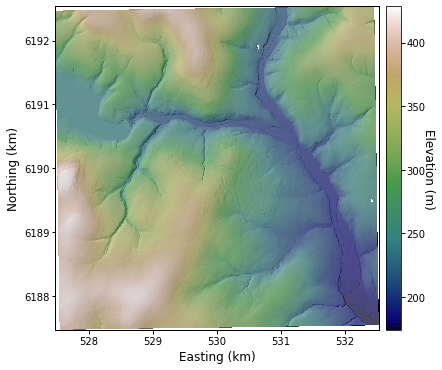

In [2]:
%matplotlib inline
Base_file = "NT66SE_50CM_DTM_PHASE3_UTM"
DataDirectory = "/LSDTopoTools/data/lammermuir/"
this_img = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth", save_fig=False, size_format="geomorphology")

Now lets plot the curvature data

Your colourbar will be located: right
xsize: 1691 and y size: 1691
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: WGS 84 / UTM zone 30N
WGS 84 / UTM zone 30N
This seems to be from the new gdal version
Zone string is: 30N
The zone is: 30
And the hemisphere is: N
The EPSG string is: epsg:32630
epsg:32630
minimum values are x: 527468.0 and y: 6187462.0
I made the ticks.
x labels are: 
['528', '529', '530', '531', '532']
x locations are:
[528000.0, 529000.0, 530000.0, 531000.0, 532000.0]
y labels are: 
['6188', '6189', '6190', '6191', '6192']
y locations are:
[6188000.0, 6189000.0, 6190000.0, 6191000.0, 6192000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1691 and y size: 1691
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection str

<Figure size 432x288 with 0 Axes>

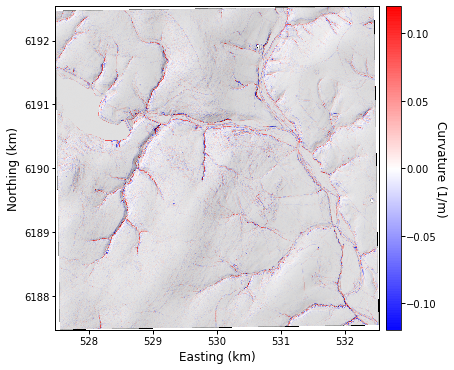

In [3]:
Base_file = "NT66SE_50CM_DTM_PHASE3_UTM"
Drape_prefix = "NT66SE_50CM_DTM_PHASE3_UTM_CURV"
DataDirectory = "/LSDTopoTools/data/lammermuir/"
img_name2 = lsdmw.SimpleDrape(DataDirectory,Base_file, Drape_prefix, 
                              cmap = "bwr", cbar_loc = "right", 
                              cbar_label = "Curvature (1/m)",
                              save_fig=False, size_format="geomorphology",
                              colour_min_max = [-0.12,0.12])